# Spanish Rail Ticket Analysis

### This notebook explores a dataset of train tickets in Spain, to uncover insights into travel patterns, pricing, and other relevant factors. 

### Phase 1: Importing and data cleaning
In this phase of the project, we modify the dataframe to enhance the quality of information and prevent inaccurate findings. 
The key steps in this phase include:
- Import dataframe
- Data type conversion to ensuring all data types are correctly set to facilitate accurate analysis.
- Column removal to delete unnecessary columns that do not contribute to the analysis.
- Duplicates review to identify and removing duplicate records and maintain data integrity.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as Profile
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read csv file
df = pd.read_csv('thegurus-opendata-renfe-trips.csv')

# View datframe
df.head()

,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,meta,insert_date
0,1,renfe,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,3.08,AVE,Preferente,68.95,Promo,NaN,{},2019-04-11 21:49:46
1,2,renfe,MADRID,BARCELONA,2019-04-18 13:25:00,2019-04-18 16:24:00,2.98,AVE-TGV,Turista,107.70,Flexible,NaN,{},2019-04-11 21:49:46
2,3,renfe,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,2.83,AVE,Turista,75.40,Promo,NaN,{},2019-04-11 21:49:46
3,4,renfe,MADRID,BARCELONA,2019-04-18 15:30:00,2019-04-18 18:40:00,3.17,AVE,Preferente,NaN,Promo,NaN,{},2019-04-11 21:49:46
4,5,renfe,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,2.50,AVE,Turista Plus,106.75,Promo,NaN,{},2019-04-11 21:49:46


In [3]:
# View dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38753060 entries, 0 to 38753059
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             int64  
 1   company        object 
 2   origin         object 
 3   destination    object 
 4   departure      object 
 5   arrival        object 
 6   duration       float64
 7   vehicle_type   object 
 8   vehicle_class  object 
 9   price          float64
 10  fare           object 
 11  seats          float64
 12  meta           object 
 13  insert_date    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 4.0+ GB


In [4]:
# Null percentage by column
null_percentage = df.isnull().sum() * 100 / len(df)
null_percentage

id                0.000000
company           0.000000
origin            0.000000
destination       0.000000
departure         0.000000
arrival           0.000000
duration          0.000000
vehicle_type      0.000000
vehicle_class    20.731883
price            23.636712
fare             20.731883
seats            96.781103
meta              0.000000
insert_date       0.000000
dtype: float64

In [5]:
# Unique values in the company column
df['company'].unique()

array(['renfe'], dtype=object)

Takeaway
- Since the company column only contains the same value, it will be removed from the dataframe

In [6]:
# Convert id column into object
df['id'] = df['id'].astype(str)

In [7]:
# Remove unnecessary columns 
df = df.drop(['company','meta','insert_date', 'seats'], axis=1)

In [8]:
# Check for duplicates
df.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
38753055    False
38753056    False
38753057    False
38753058    False
38753059    False
Length: 38753060, dtype: bool

## Phase 2: Descriptive statistics, visualization and pattern identification

#### This phase of the project involves investigating and summarizing the main characteristics of the dataset. The goal is to understand the data, discover patterns, and spot anomalies.

In [9]:
# View a summary statistics of the numerical columns
df.describe()

,duration,price
count,3.875306e+07,2.959311e+07
mean,2.778496e+00,5.822162e+01
std,1.486362e+00,2.476530e+01
min,3.700000e-01,0.000000e+00
25%,1.800000e+00,3.920000e+01
50%,2.530000e+00,5.570000e+01
75%,2.980000e+00,7.540000e+01
max,1.242000e+01,3.428000e+02


#### Present a visual representation of the distribution of trips across various categories


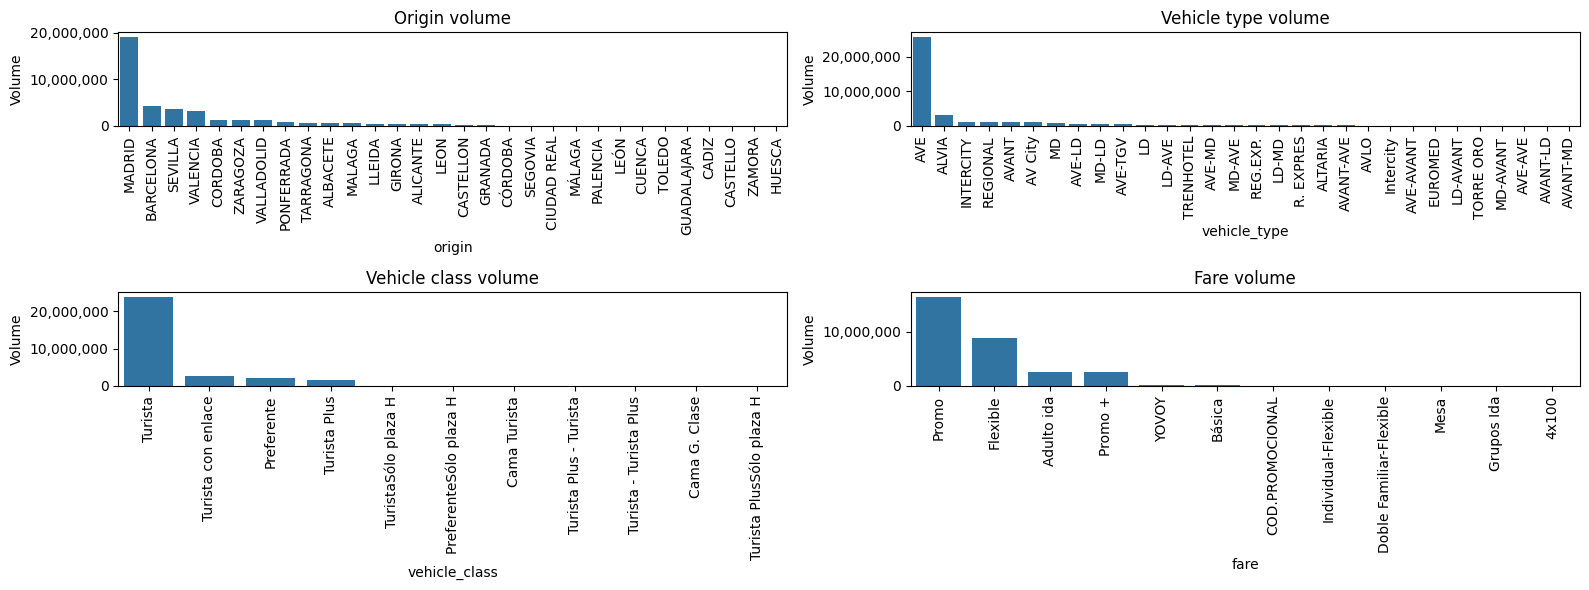

<Figure size 640x480 with 0 Axes>

In [11]:
# Set the display option to avoid scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)

# Create figure
figure, axes = plt.subplots(2, 2, figsize=(16,6))

# View the volume of departure location
sns.barplot(ax=axes[0,0], x= df['origin'].value_counts().index, y= df['origin'].value_counts())
axes[0,0].set_title('Origin volume')
axes[0,0].tick_params(axis='x', rotation=90)
axes[0,0].set_ylabel('Volume')
axes[0,0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Plot the vehicle types
sns.barplot(ax=axes[0,1], x= df['vehicle_type'].value_counts().index, y= df['vehicle_type'].value_counts())
axes[0,1].set_title('Vehicle type volume')
axes[0,1].tick_params(axis='x', rotation=90)
axes[0,1].set_ylabel('Volume')
axes[0,1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Plot the vehicle classes
sns.barplot(ax=axes[1,0], x= df['vehicle_class'].value_counts().index, y= df['vehicle_class'].value_counts())
axes[1,0].set_title('Vehicle class volume')
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,0].set_ylabel('Volume')
axes[1,0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Plot the fare types
sns.barplot(ax=axes[1,1], x= df['fare'].value_counts().index, y= df['fare'].value_counts())
axes[1,1].set_title('Fare volume')
axes[1,1].tick_params(axis='x', rotation=90)
axes[1,1].set_ylabel('Volume')
axes[1,1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# View barcharts 
plt.tight_layout()
plt.show()
plt.clf()

#### Vusualize the distribution of of price by fare tyoe

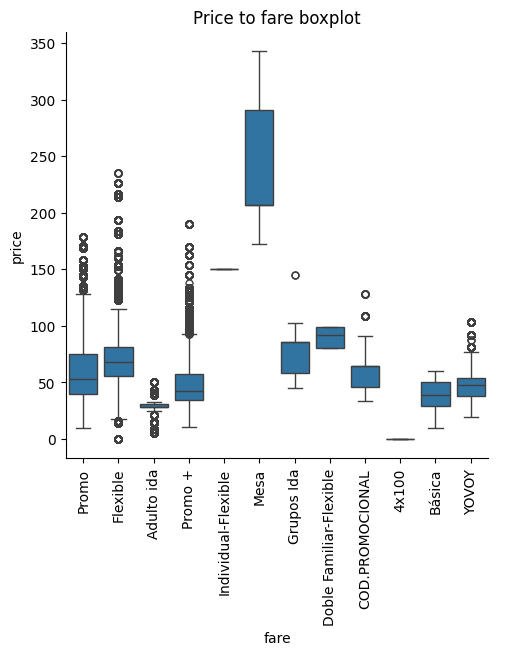

<Figure size 640x480 with 0 Axes>

In [12]:
# Display boxplot of price to fare distribution
sns.catplot(data= df, x='fare', y='price', kind='box')
plt.title('Price to fare boxplot')
plt.xticks(rotation=90)
plt.show()
plt.clf()

#### Vusualize the distribution of of duration by vehicle type

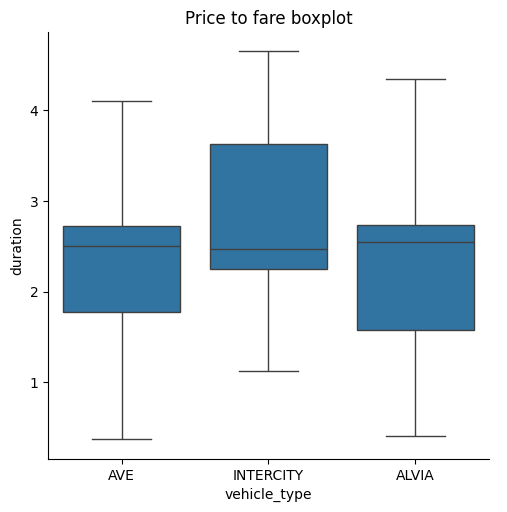

<Figure size 640x480 with 0 Axes>

In [13]:
# Return the top 3 most significant vehicle type
top_vehicle_type = df['vehicle_type'].value_counts().nlargest(3).reset_index()
df_top_vehicle_type = df[df['vehicle_type'].isin(top_vehicle_type['vehicle_type'])]

# Display boxplot of price to fare distribution
sns.catplot(data= df_top_vehicle_type, x='vehicle_type', y='duration', kind="box")
plt.title('Price to fare boxplot')

# Show boxplot
plt.show()
plt.clf()

#### Vusualize the distribution of of price by vehicle class

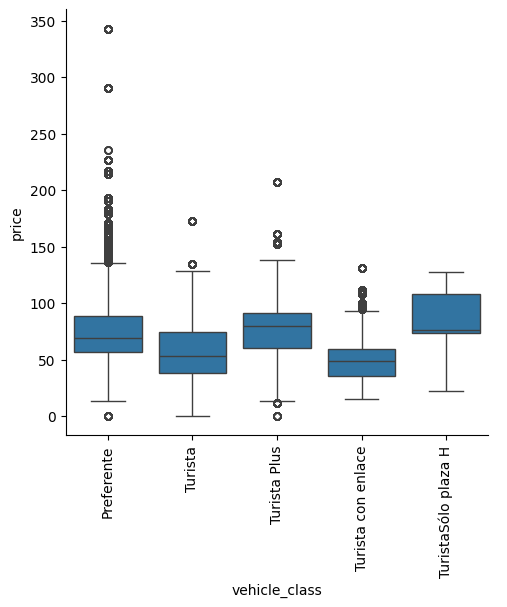

<Figure size 640x480 with 0 Axes>

In [15]:
# Return the top 5 most significant vehicle classes
top_vehicle_class = df['vehicle_class'].value_counts().nlargest(5).reset_index()
df_top_vehicles_class = df[df['vehicle_class'].isin(top_vehicle_class['vehicle_class'])]

# Box plot of the top 5 vehicle classes
sns.catplot(data=df_top_vehicles_class, x="vehicle_class", y="price", kind='box')
plt.xticks(rotation=90)

# Show boxplot
plt.show()
plt.clf()

#### Vusualize the relationship of between price and duration while taking into account vehcle type

<Figure size 1400x800 with 0 Axes>

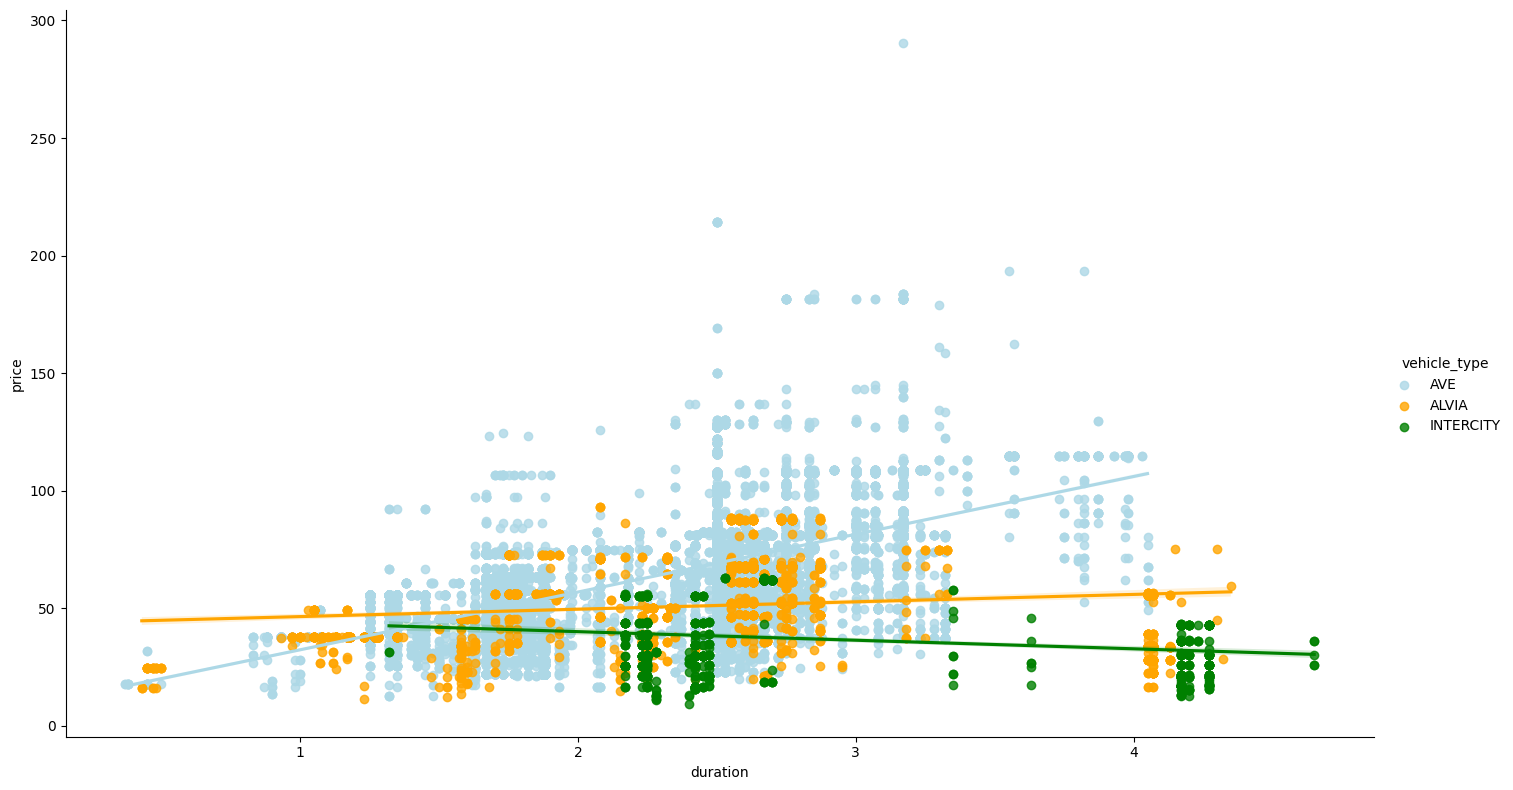

<Figure size 640x480 with 0 Axes>

In [16]:
# Sample dataset
top_vehicle_sample = df_top_vehicle_type.sample(30000)

# Create figure
plt.figure(figsize=(14, 8))

# Create scatter plot 
sns.lmplot(data=top_vehicle_sample, x='duration', y='price', hue='vehicle_type', height=8, aspect=1.75, palette=['#ADD8E6', '#FFA500', '#008000'])

# Show scatterplot
plt.show()
plt.clf()

In [17]:
# Sample dataframe
numerized_df = df.sample(30000)

# Convert data to be numerized
for column in numerized_df.columns:
    if numerized_df[column].dtype ==  'object':
        numerized_df[column] = numerized_df[column].astype('category')
        numerized_df[column] = numerized_df[column].cat.codes

# View numerized dataframe
numerized_df.head()

,id,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare
15700735,4866,2,17,7860,8782,3,7,3,85,4
20643636,9093,16,17,10419,11535,2,7,3,75,3
13345639,2885,23,17,6972,7874,2,7,3,60,4
35250114,21723,24,17,19184,20906,8,26,3,41,0
766525,28035,26,17,483,524,2,15,3,55,3


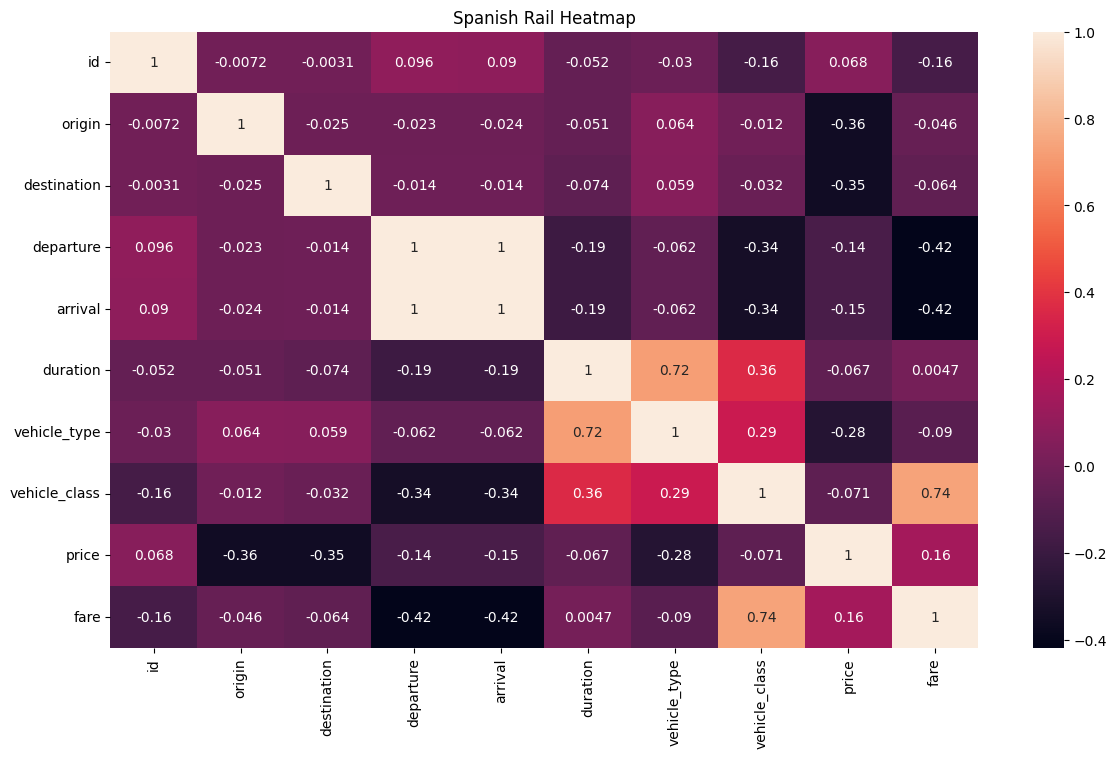

In [18]:
# Create figure
plt.figure(figsize=(14, 8))

# Build correlation matrix
heatmap_matrix = numerized_df.corr(method='pearson')

# Create Heatmap
sns.heatmap(heatmap_matrix, annot=True)
plt.title('Spanish Rail Heatmap')

# View graph
plt.show()

In [20]:

# Correlation matrix table
corr_pair = heatmap_matrix.unstack()

# Sort correlations
sorted_corr_pair = corr_pair.sort_values()

# Print sorted correlation 
print(sorted_corr_pair)

arrival      fare          -0.4182
fare         arrival       -0.4182
departure    fare          -0.4168
fare         departure     -0.4168
origin       price         -0.3569
                             ...  
departure    departure      1.0000
destination  destination    1.0000
origin       origin         1.0000
price        price          1.0000
fare         fare           1.0000
Length: 100, dtype: float64


In [21]:
# Sample dataset
df_sample_report = df.sample(10000)

# Create exploratory
profile = Profile.ProfileReport(df_sample_report)
profile.to_file('your_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 66.62it/s]


profile = Profile.ProfileReport(df_sample)

## Phase 3: Questions

#### Question 1: Are tickets more expensive one way or another between Barcelona and Madrid?
- Since AVE tickets are significantly more common, the analysis will be restricted to that ticket type
- To answer this question we will conduct a two sided T-test to see if there is a statistically significant difference

In [22]:
# Sample the dataset
df_sample = df.sample(30000)

# Filter for both routes
barcelona_to_madrid = df_sample[(df['origin']== 'BARCELONA') & (df_sample['destination']== 'MADRID')]['price'].dropna()
madrid_to_barcelona = df_sample[(df_sample['origin']== 'MADRID') & (df_sample['destination']== 'BARCELONA')]['price'].dropna()

# Significance level
alpha = 0.05 

# Conduct an independent two-sided t-test
t_stat, p_value = stats.ttest_ind(barcelona_to_madrid, madrid_to_barcelona , equal_var=False)

# Display test results
if p_value < alpha:
    print('The difference in average prices is statistically significant.This means that we reject null hypothesis')
else:
    print('The difference in average prices is not statistically significant. This means that we fail reject null hypothesis')

print('T-statistic: '+ str(t_stat))
print('P-value: '+ str(p_value))

The difference in average prices is not statistically significant. This means that we fail reject null hypothesis
T-statistic: 0.5305160175156467
P-value: 0.5957753437290938


/var/folders/gf/dq2q27v16rxg12671zrdw3nm0000gn/T/ipykernel_18052/2503975370.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  barcelona_to_madrid = df_sample[(df['origin']== 'BARCELONA') & (df_sample['destination']== 'MADRID')]['price'].dropna()


### Question 2: Is there a significant difference in the average duration of trips between different vehicle_class categories?

In [23]:
# Filter duration data by vehicle class categories
dur_preferente = df_sample[df_sample['vehicle_class'] == 'Preferente']['duration'].dropna()
dur_turista = df_sample[df_sample['vehicle_class'] == 'Turista']['duration'].dropna()
dur_turista_plus = df_sample[df_sample['vehicle_class'] == 'Turista Plus']['duration'].dropna()

# Anova test
f_stat, p_value = stats.f_oneway(dur_preferente, dur_turista, dur_turista_plus)

# Print takeaways
if p_value < alpha:
    print('There is a significant difference in the average duration of trips between different vehicle_class categories. This means that we reject null hypothesis')
else:
    print('There is no significant difference in the average duration of trips between different vehicle_class categories. This means that we fail reject null hypothesis')
    
print('F-statistic: '+ str(f_stat))
print('P-value: '+ str(p_value))

There is a significant difference in the average duration of trips between different vehicle_class categories. This means that we reject null hypothesis
F-statistic: 15.982025362851289
P-value: 1.1594157305067644e-07


In [24]:
# Preparing data for Tukey's HSD test
df_tukey = df_sample.dropna(subset=['duration', 'vehicle_class'])

# Perform Tukey's test
tukey_result = pairwise_tukeyhsd(endog=df_tukey['duration'], groups=df_tukey['vehicle_class'], alpha=0.05)

# Print the results
print(tukey_result)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                 group2         meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------
          Cama Turista             Preferente  -2.8557    0.0 -4.5037 -1.2076   True
          Cama Turista PreferenteSólo plaza H  -2.7875 0.0008 -4.8275 -0.7474   True
          Cama Turista                Turista   -2.676    0.0 -4.3211 -1.0309   True
          Cama Turista Turista - Turista Plus  -3.2929 0.0193 -6.2957   -0.29   True
          Cama Turista           Turista Plus  -2.6023    0.0 -4.2515 -0.9532   True
          Cama Turista Turista Plus - Turista   4.8611    0.0  2.3131  7.4092   True
          Cama Turista     Turista con enlace   -0.214    1.0 -1.8613  1.4334  False
          Cama Turista    TuristaSólo plaza H  -2.7432    0.0 -4.4434 -1.0429   True
            Preferente PreferenteSólo plaza H   0.0682    1.0 -1.

Takeaway
- All comparisons with "Cama Turista" show True for rejecting the null hypothesis, indicating significant differences in average trip duration with other categories
- There is no significant difference between these Turista and Turista Plus